In [1]:
# import packages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.express as px

## Read input

In [62]:
mrg = pd.read_excel('FINAL_tables/FINAL_only_the_best_genomes_with_2nd_cluster_with_taxa_with_binsNmb_m.xlsx')
mrg.head(2)  

,best_cluster_genome,sample_name,completeness,contamination,strain_heterogeneity,length,N50,Bin_qual,1st_clustering_cluster,1st_clustering_centrality,...,phylum,class,order,family,genus,sp,GTDBv214_taxa_notes,2nd_clustering_cluster.1,number_of_bins_per_cluster,best_cluster_genome.1
0,VLB6XN_256644.fa,VLB6XN,96.55,3.45,0.0,2869579,106856,HQ,p1-629_1,0.0,...,Bacillota_A,Clostridia,Lachnospirales,Lachnospiraceae,14-2,14-2 sp012519695,NaN,1030_1,1.0,VLB6XN_256644.fa
1,VDFRDM_metabat.13.fa,VDFRDM,89.66,0.00,0.0,3369048,49428,MQ,p5-586_1,0.0,...,Bacillota_A,Clostridia,Lachnospirales,Lachnospiraceae,14-2,14-2 sp934434905,NaN,1347_1,2.0,VDFRDM_metabat.13.fa


In [55]:
mrg.columns

Index(['best_cluster_genome', 'sample_name', 'completeness', 'contamination',
       'strain_heterogeneity', 'length', 'N50', 'Bin_qual',
       '1st_clustering_cluster', '1st_clustering_centrality',
       '2nd_clustering_cluster', 'fastani_ani', 'closest_placement_reference',
       'closest_placement_ani', 'domain', 'phylum', 'class', 'order', 'family',
       'genus', 'sp', 'GTDBv214_taxa_notes', '2nd_clustering_cluster.1',
       'number_of_bins_per_cluster', 'best_cluster_genome.1'],
      dtype='object')

In [65]:
mrg['family'].isna().sum()


0

In [64]:
mrg['family'] = mrg['family'].fillna('UNKNOWN')
mrg['genus'] = mrg['genus'].fillna('UNKNOWN')
mrg['sp'] = mrg['sp'].fillna('UNKNOWN')

## Describe abundant & rare taxa

In [66]:
# all db taxa
fig = px.sunburst(
    mrg,
    path=['phylum', 'class', 'order'],
    values='number_of_bins_per_cluster',
    title="All species, \n GTDB, release214",
    color='phylum',
    color_discrete_sequence=px.colors.qualitative.Pastel,
    width=750, 
    height=750
)

fig.write_html("taxa_results/All_taxa.html")

In [68]:
mrg_abundant = mrg[mrg['number_of_bins_per_cluster'] > 18]
len(mrg_abundant)

507

In [69]:
# abundant taxa
fig = px.sunburst(
    mrg_abundant.sort_values(by='phylum', ascending=False),
    path=['phylum', 'class', 'order'],
    values='number_of_bins_per_cluster',
    title="Abundant strains, \n GTDB, release214",
    color='phylum',
    color_discrete_sequence=px.colors.qualitative.Pastel,
    width=750, 
    height=750
)

fig.write_html("taxa_results/Abundant_strains.html")

In [70]:
# abundant taxa sp level
fig = px.sunburst(
    mrg_abundant.sort_values(by='phylum', ascending=False),
    path=['phylum', 'class', 'order','family','genus','sp'],
    values='number_of_bins_per_cluster',
    title="Abundant strains, \n GTDB, release214",
    color='phylum',
    color_discrete_sequence=px.colors.qualitative.Pastel,
    width=750, 
    height=750
)

fig.write_html("taxa_results/Abundant_strains_sp_level.html")

In [71]:
mrg_rare = mrg[mrg['number_of_bins_per_cluster'] < 18]
len(mrg_rare)

1727

In [33]:
# rare taxa
fig = px.sunburst(
    mrg_rare.sort_values(by='phylum', ascending=False),
    path=['phylum', 'class', 'order'],
    values='number_of_bins_per_cluster',
    title="Rare strains, \n GTDB, release214",
    color='phylum',
    color_discrete_sequence=px.colors.qualitative.Pastel,
    width=750, 
    height=750
)

fig.write_html("taxa_results/Rare_strains.html")

In [73]:
# rare taxa sp level
fig = px.sunburst(
    mrg_rare.sort_values(by='phylum', ascending=False),
    path=['phylum', 'class', 'order','family','genus','sp'],
    values='number_of_bins_per_cluster',
    title="Rare strains sp_level, \n GTDB, release214",
    color='phylum',
    color_discrete_sequence=px.colors.qualitative.Pastel,
    width=750, 
    height=750
)

fig.write_html("taxa_results/Rare_strains_sp_level.html")

## Describe new taxa

In [74]:
mrg['GTDBv214_taxa_notes'].value_counts()

unknown_sp        333
unknown_genus      25
unknown_family      1
Name: GTDBv214_taxa_notes, dtype: int64

In [75]:
mrg[mrg['GTDBv214_taxa_notes'] == 'unknown_family']

,best_cluster_genome,sample_name,completeness,contamination,strain_heterogeneity,length,N50,Bin_qual,1st_clustering_cluster,1st_clustering_centrality,...,phylum,class,order,family,genus,sp,GTDBv214_taxa_notes,2nd_clustering_cluster.1,number_of_bins_per_cluster,best_cluster_genome.1
1914,VY8V5H_metabat.173.fa,VY8V5H,93.97,0.0,0.0,1645342,10067,HQ,p1-701_1,0.988545,...,Bacillota_A,Clostridia,Christensenellales,UNKNOWN,UNKNOWN,UNKNOWN,unknown_family,1742_1,11.0,VY8V5H_metabat.173.fa


In [94]:
# Plot the new genus
mrg_ng = mrg[mrg['GTDBv214_taxa_notes'] == 'unknown_genus']
len(mrg_ng)

fig = px.sunburst(
    mrg_ng,
    path=['phylum', 'class', 'order', 'family'],
    values='number_of_bins_per_cluster',
    title="New genus, \n GTDB, release214",
    color_discrete_sequence=px.colors.qualitative.Pastel,
    width=750, 
    height=750
)

fig.write_html("taxa_results/New_genus.html")


In [92]:
mrg_ng

,best_cluster_genome,sample_name,completeness,contamination,strain_heterogeneity,length,N50,Bin_qual,1st_clustering_cluster,1st_clustering_centrality,...,phylum,class,order,family,genus,sp,GTDBv214_taxa_notes,2nd_clustering_cluster.1,number_of_bins_per_cluster,best_cluster_genome.1
1913,V0D5WV_vamb.89310.fa,V0D5WV,91.38,0.00,0.00,1031317,340691,HQ,p2-753_1,0.000000,...,Verrucomicrobiota,Verrucomicrobiae,Opitutales,UBA9783,UNKNOWN,UNKNOWN,unknown_genus,1638_1,13.0,V0D5WV_vamb.89310.fa
1944,VL9SET_metabat.143.fa,VL9SET,96.55,1.72,0.00,2662576,42498,HQ,p1-508_1,0.983775,...,Bacillota_A,Clostridia,Oscillospirales,Acutalibacteraceae,UNKNOWN,UNKNOWN,unknown_genus,1405_1,4.0,VL9SET_metabat.143.fa
1968,V8R4AG_metabat.181.fa,V8R4AG,88.79,0.86,100.00,1493110,8615,MQ,p4-387_1,0.000000,...,Bacillota_A,Clostridia,Oscillospirales,Acutalibacteraceae,UNKNOWN,UNKNOWN,unknown_genus,1599_1,3.0,V8R4AG_metabat.181.fa
1969,VJ3ILR_vamb.112167.fa,VJ3ILR,94.83,1.88,0.00,1641470,125437,HQ,p7-209_1,0.987929,...,Bacillota_A,Clostridia,Christensenellales,Borkfalkiaceae,UNKNOWN,UNKNOWN,unknown_genus,185_1,3.0,VJ3ILR_vamb.112167.fa
1970,V4PAWM_maxbin.056.fa,V4PAWM,100.00,0.00,0.00,2043219,200120,HQ,p3-529_1,0.000000,...,Bacillota_A,Clostridia,Christensenellales,RUG350,UNKNOWN,UNKNOWN,unknown_genus,1794_1,3.0,V4PAWM_maxbin.056.fa
2020,VMQ74P_metabat.24.fa,VMQ74P,83.07,1.72,0.00,1664996,5797,MQ,p1-806_1,0.982097,...,Bacillota_A,Clostridia,Christensenellales,MB2-83,UNKNOWN,UNKNOWN,unknown_genus,178_1,2.0,VMQ74P_metabat.24.fa
2021,VN82MY_vamb_278278.fa,VN82MY,96.55,0.00,0.00,1901440,77180,HQ,p1-724_1,0.981644,...,Bacillota_A,Clostridia,Oscillospirales,Ruminococcaceae,UNKNOWN,UNKNOWN,unknown_genus,1781_1,2.0,VN82MY_vamb_278278.fa
2022,VQB5FK_vamb.61517_sub.fa,VQB5FK,86.78,0.00,0.00,2423876,35620,MQ,p8-670_1,0.000000,...,Bacillota_A,Clostridia,UMGS1810,UMGS1810,UNKNOWN,UNKNOWN,unknown_genus,1892_1,2.0,VQB5FK_vamb.61517_sub.fa
2240,VEOJ4I_metabat.96.fa,VEOJ4I,94.48,4.31,0.00,1905600,298449,HQ,p6-777_1,0.000000,...,Bacillota_C,Negativicutes,Acidaminococcales,Acidaminococcaceae,UNKNOWN,UNKNOWN,unknown_genus,1141_1,1.0,VEOJ4I_metabat.96.fa
2241,V2NNDS_metabat.110.fa,V2NNDS,91.80,2.04,25.00,3032115,10716,HQ,p1-522_1,0.000000,...,Bacillota_A,Clostridia,Oscillospirales,Acutalibacteraceae,UNKNOWN,UNKNOWN,unknown_genus,1365_1,1.0,V2NNDS_metabat.110.fa


In [77]:
# Plot the new species
mrg_sp = mrg[mrg['GTDBv214_taxa_notes'] == 'unknown_sp']
len(mrg_sp)

fig = px.sunburst(
    mrg_sp,
    path=['phylum', 'class', 'order', 'family','genus'],
    values='number_of_bins_per_cluster',
    title="New species, \n GTDB, release214",
    color_discrete_sequence=px.colors.qualitative.Pastel,
    width=750, 
    height=750
)

fig.write_html("taxa_results/New_species.html")

In [113]:
mrg_sp['number_of_bins_per_cluster'].sort_values(ascending=False)

1904    28.0
1905    28.0
1906    20.0
1907    17.0
1908    17.0
        ... 
2258     NaN
2259     NaN
2260     NaN
2261     NaN
2262     NaN
Name: number_of_bins_per_cluster, Length: 333, dtype: float64

<Axes: >

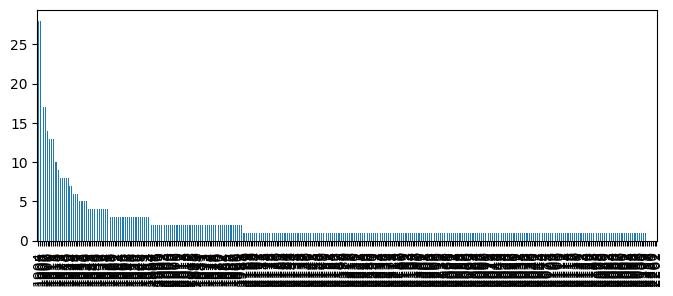

In [112]:
mrg_sp['number_of_bins_per_cluster'].sort_values(ascending=False).plot(kind='bar', figsize=(8,3))

## Compare with known taxa

In [22]:
# Plot all new taxa
mrg_n = mrg[(mrg['GTDBv214_taxa_notes'] == 'unknown_family') | (mrg['GTDBv214_taxa_notes'] == 'unknown_genus') | (mrg['GTDBv214_taxa_notes'] == 'unknown_sp')].sort_values(by=['phylum'])
len(mrg_n)

fig = px.sunburst(
    mrg_n,
    path=['phylum', 'class', 'order'],
    values='number_of_bins_per_cluster',
    title="New species, \n GTDB, release214",
    color='phylum',
    width=750, 
    height=750
)

fig.write_html("taxa_results/New_taxa.html")

In [23]:
# Plot all new taxa
mrg_o = mrg[(mrg['GTDBv214_taxa_notes'] != 'unknown_family') & (mrg['GTDBv214_taxa_notes'] != 'unknown_genus') & (mrg['GTDBv214_taxa_notes'] != 'unknown_sp')].sort_values(by=['phylum'])
len(mrg_o)

fig = px.sunburst(
    mrg_o,
    path=['phylum', 'class', 'order'],
    values='number_of_bins_per_cluster',
    title="Known species, \n GTDB, release214",
    color='phylum',
    width=750, 
    height=750
)

fig.write_html("taxa_results/Known_taxa.html")